# STAGE 2 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Refdinal/insight-hustler/refs/heads/master/data/raw/aug_train.csv")

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,19148,19149,19150,19151,19152,19153,19154,19155,19156,19157
enrollee_id,8949,29725,11561,33241,666,21651,28806,402,27107,699,...,9212,251,32313,11385,29754,7386,31398,24576,5756,23834
city,city_103,city_40,city_21,city_115,city_162,city_176,city_160,city_46,city_103,city_103,...,city_21,city_103,city_160,city_149,city_103,city_173,city_103,city_103,city_65,city_67
city_development_index,0.92,0.776,0.624,0.789,0.767,0.764,0.92,0.762,0.92,0.92,...,0.624,0.92,0.92,0.689,0.92,0.878,0.92,0.92,0.802,0.855
gender,Male,Male,NaN,NaN,Male,NaN,Male,Male,Male,NaN,...,NaN,Male,Female,Male,Female,Male,Male,Male,Male,NaN
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,...,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience,Has relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,NaN,no_enrollment,Part time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,...,no_enrollment,no_enrollment,no_enrollment,Full time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters,Graduate,High School,Graduate,Graduate,Graduate,...,Masters,Masters,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,High School,Primary School
major_discipline,STEM,STEM,STEM,Business Degree,STEM,STEM,NaN,STEM,STEM,STEM,...,STEM,STEM,STEM,NaN,Humanities,Humanities,STEM,STEM,NaN,NaN
experience,>20,15,5,<1,>20,11,5,13,7,17,...,3,9,10,2,7,14,14,>20,<1,2
company_size,NaN,50-99,NaN,NaN,50-99,NaN,50-99,<10,50-99,10000+,...,100-500,50-99,100-500,NaN,10/49,NaN,NaN,50-99,500-999,NaN


**Features**

- enrollee_id : Unique ID for enrollee
- city: City code
- citydevelopmentindex: Developement index of *the* - city (scaled)
- gender: Gender of enrolee
- relevent_experience: Relevent experience of enrolee
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of enrolee
- major_discipline :Education major discipline of enrolee
- experience: Enrolee total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

# 1.DATA CLEANSING

## a. Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
print(" \t Columns with null \n -->",df.columns[df.isnull().any()])

 	 Columns with null 
 --> Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')


- Hanya kolom city, city development index, relevent experience, training hours and target yang tidak memiliki missing values

In [6]:
df.isna().sum()/len(df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [7]:
# Cleansing and handling missing value
df['last_new_job'] = df['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
df['enrolled_university'][df['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
df['company_size'] = df['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

df['experience'] = df['experience'].apply(lambda x: '0' if x == '<1' else x)
df['experience'] = df['experience'].apply(lambda x: '21' if x == '>20' else x)


df['company_size'].fillna('0',inplace=True)
df['company_type'].fillna('Unknown',inplace=True)
df['major_discipline'].fillna('Unknown',inplace=True)
df['gender'].fillna('Other',inplace=True)


# This is what I mean with respect to the gender categories:

df['target'].groupby(df['gender']).mean()

gender
Female    0.263328
Male      0.227819
Other     0.306235
Name: target, dtype: float64

In [8]:
df.isna().sum()/len(df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.000000
experience                0.003393
company_size              0.000000
company_type              0.000000
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [9]:
df.dropna(inplace=True)
df.dropna(inplace=True)
df.isna().sum()/len(df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

## b. Duplicated data

In [10]:
df.duplicated().sum()

0

data ini tidak memiliki data duplikat

In [11]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
nums = ['city_development_index', 'training_hours', 'target']

In [12]:
df[cats].describe().T

,count,unique,top,freq
city,18014,123,city_103,4194
gender,18014,3,Male,12772
relevent_experience,18014,2,Has relevent experience,13190
enrolled_university,18014,3,No Enrollment,13348
major_discipline,18014,7,STEM,13993
experience,18014,22,21,3182
company_size,18014,9,0,5310
company_type,18014,7,Pvt Ltd,9475
last_new_job,18014,6,1,7789


In [13]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,18014.0,0.831728,0.122115,0.448,0.745,0.91,0.92,0.949
training_hours,18014.0,65.347896,60.059220,1.000,23.000,47.00,88.00,336.000
target,18014.0,0.245420,0.430348,0.000,0.000,0.00,0.00,1.000


## c. Outlier

In [14]:
df['city_development_index'].describe()

count    18014.000000
mean         0.831728
std          0.122115
min          0.448000
25%          0.745000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

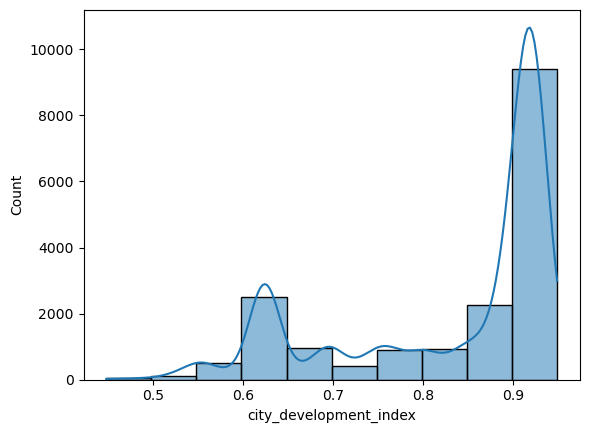

In [15]:
sns.histplot(df['city_development_index'],bins=10,kde=True)
plt.show()

- City development index memiliki nilai minimum 0.448000 dan nilai maximum 0.949000
- Mean  0.828848 and Standard Deviation 0.123362

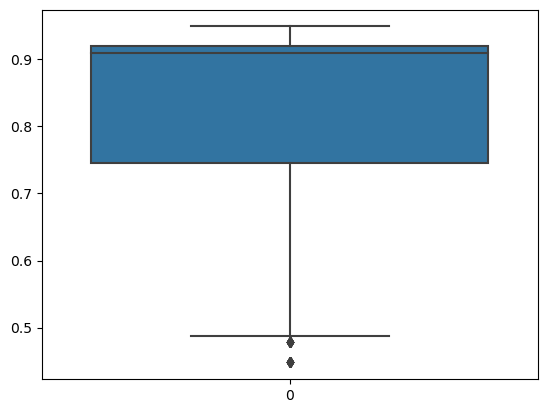

In [16]:
sns.boxplot(df['city_development_index'])
plt.show()

In [17]:
df['training_hours'].describe()

count    18014.000000
mean        65.347896
std         60.059220
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

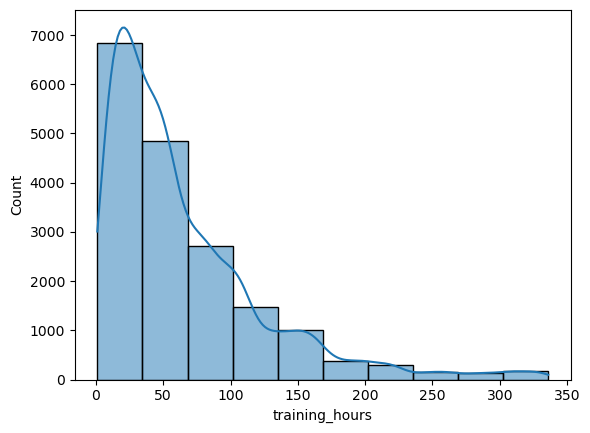

In [18]:
sns.histplot(df['training_hours'],bins=10,kde=True)
plt.show()

- Training Hours index memiliki nilai minimum 1 dan nilai maximum 336
- Mean 65.366896 dan Standard Deviation 60.058462

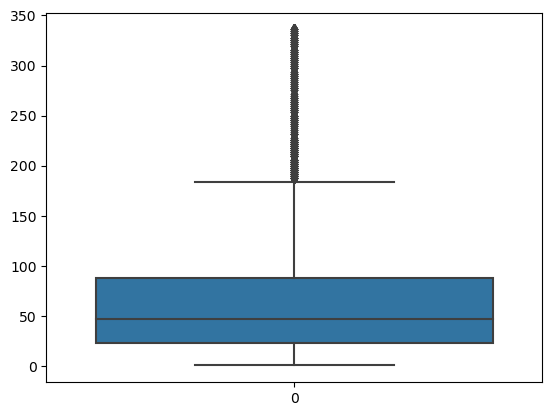

In [19]:
sns.boxplot(df['training_hours'])
plt.show()

In [20]:
df['target'].describe()

count    18014.000000
mean         0.245420
std          0.430348
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

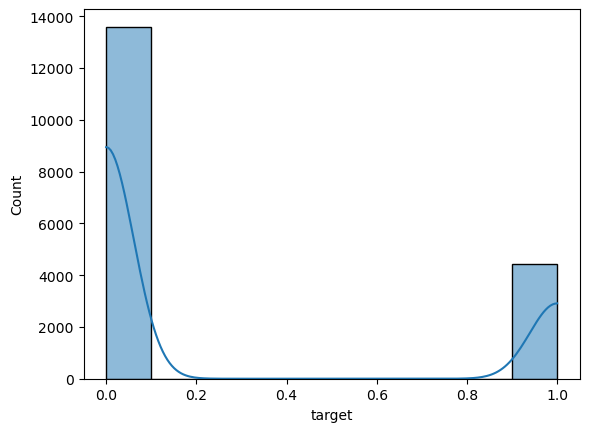

In [21]:
sns.histplot(df['target'],bins=10,kde=True)
plt.show()

- Target memiliki nilai minimum 0 dan nilai maximum  1
- Mean  0.249348 dan Standard Deviation 0.432647

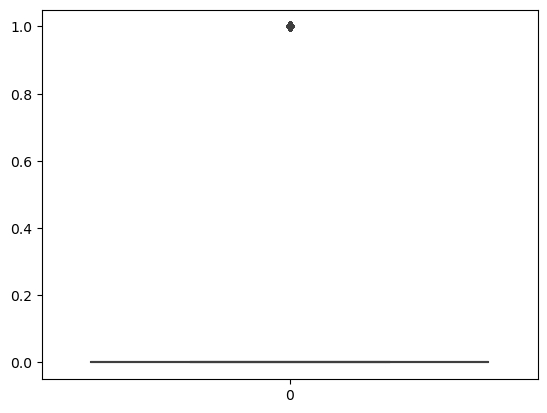

In [22]:
sns.boxplot(df['target'])
plt.show()

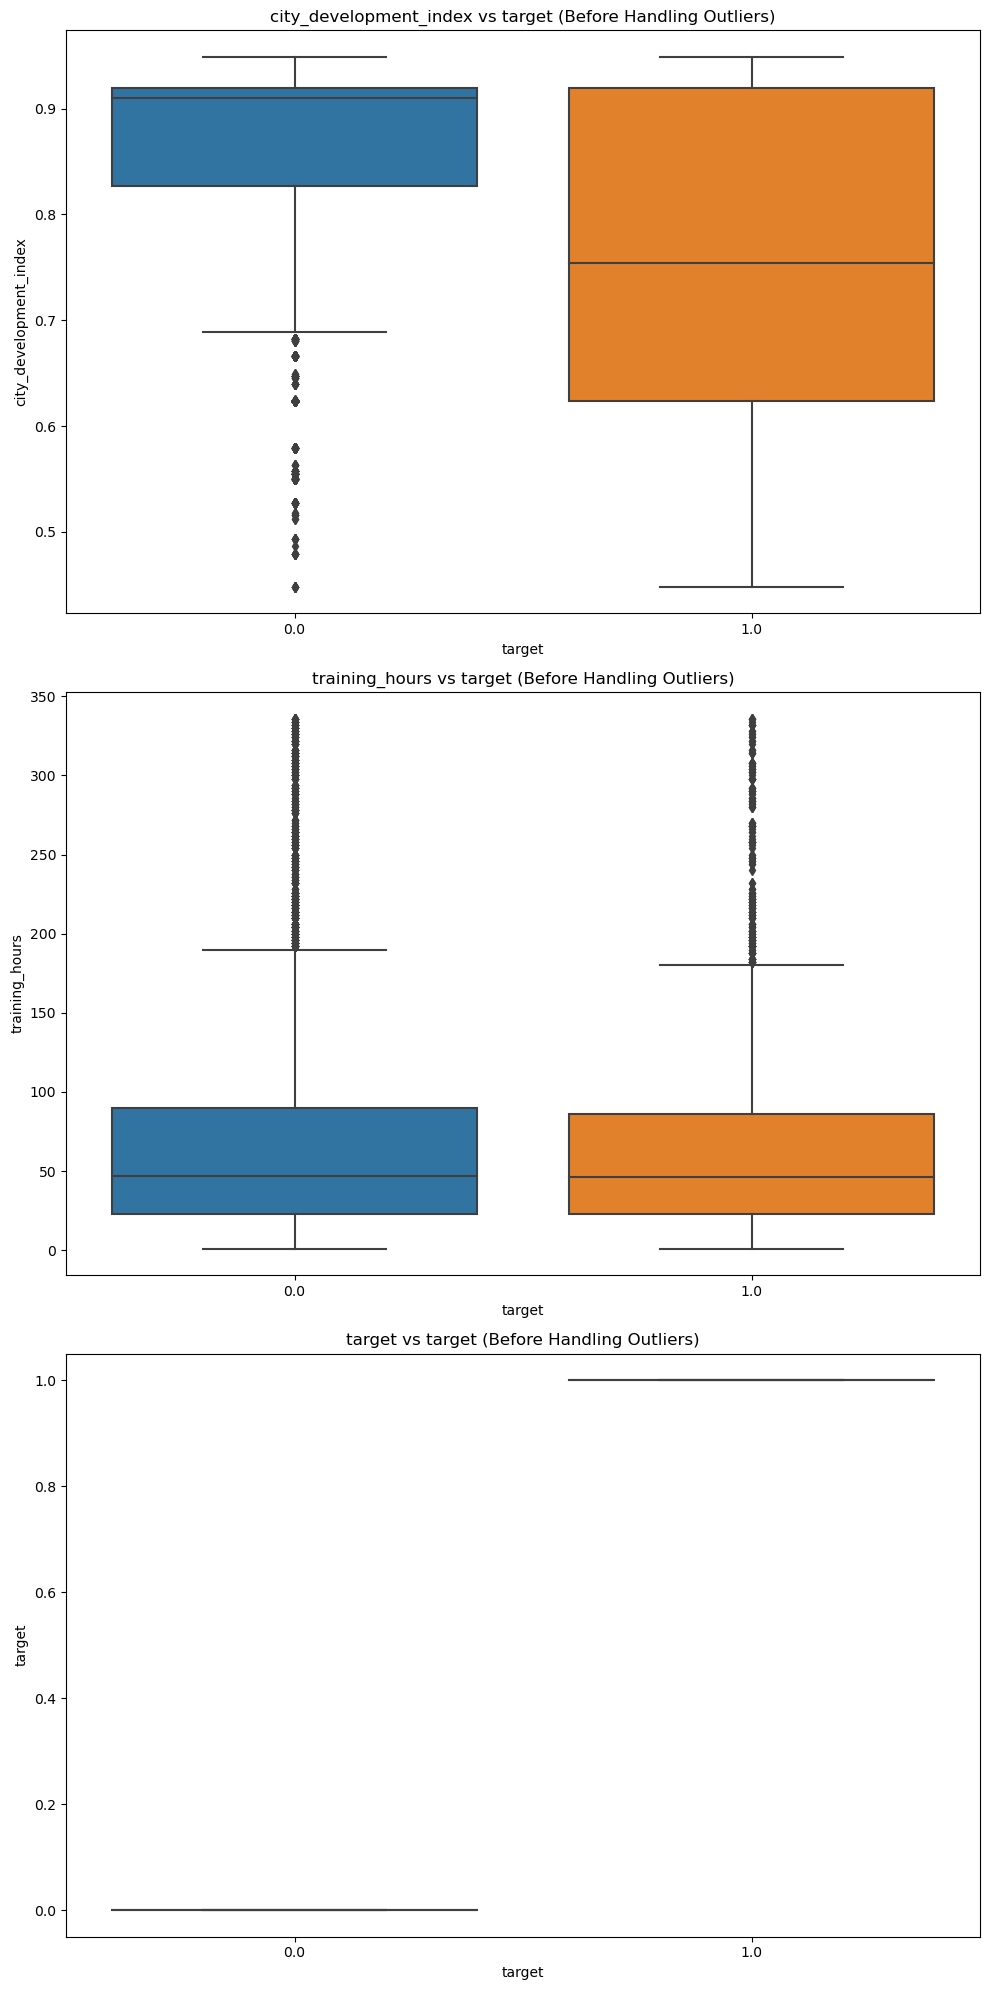

In [23]:
fig, axes = plt.subplots(len(nums), 1, figsize=(10, 20))
for i, feature in enumerate(nums):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs target (Before Handling Outliers)')
plt.tight_layout()
plt.show()

Boxplot menampilkan distribusi data numerik dan memungkinkan identifikasi outlier sebagai titik-titik yang berada di luar "whiskers" dari boxplot. Ini memberikan pandangan awal tentang bagaimana distribusi fitur numerik terkait dengan variabel target y dan menunjukkan adanya outlier.

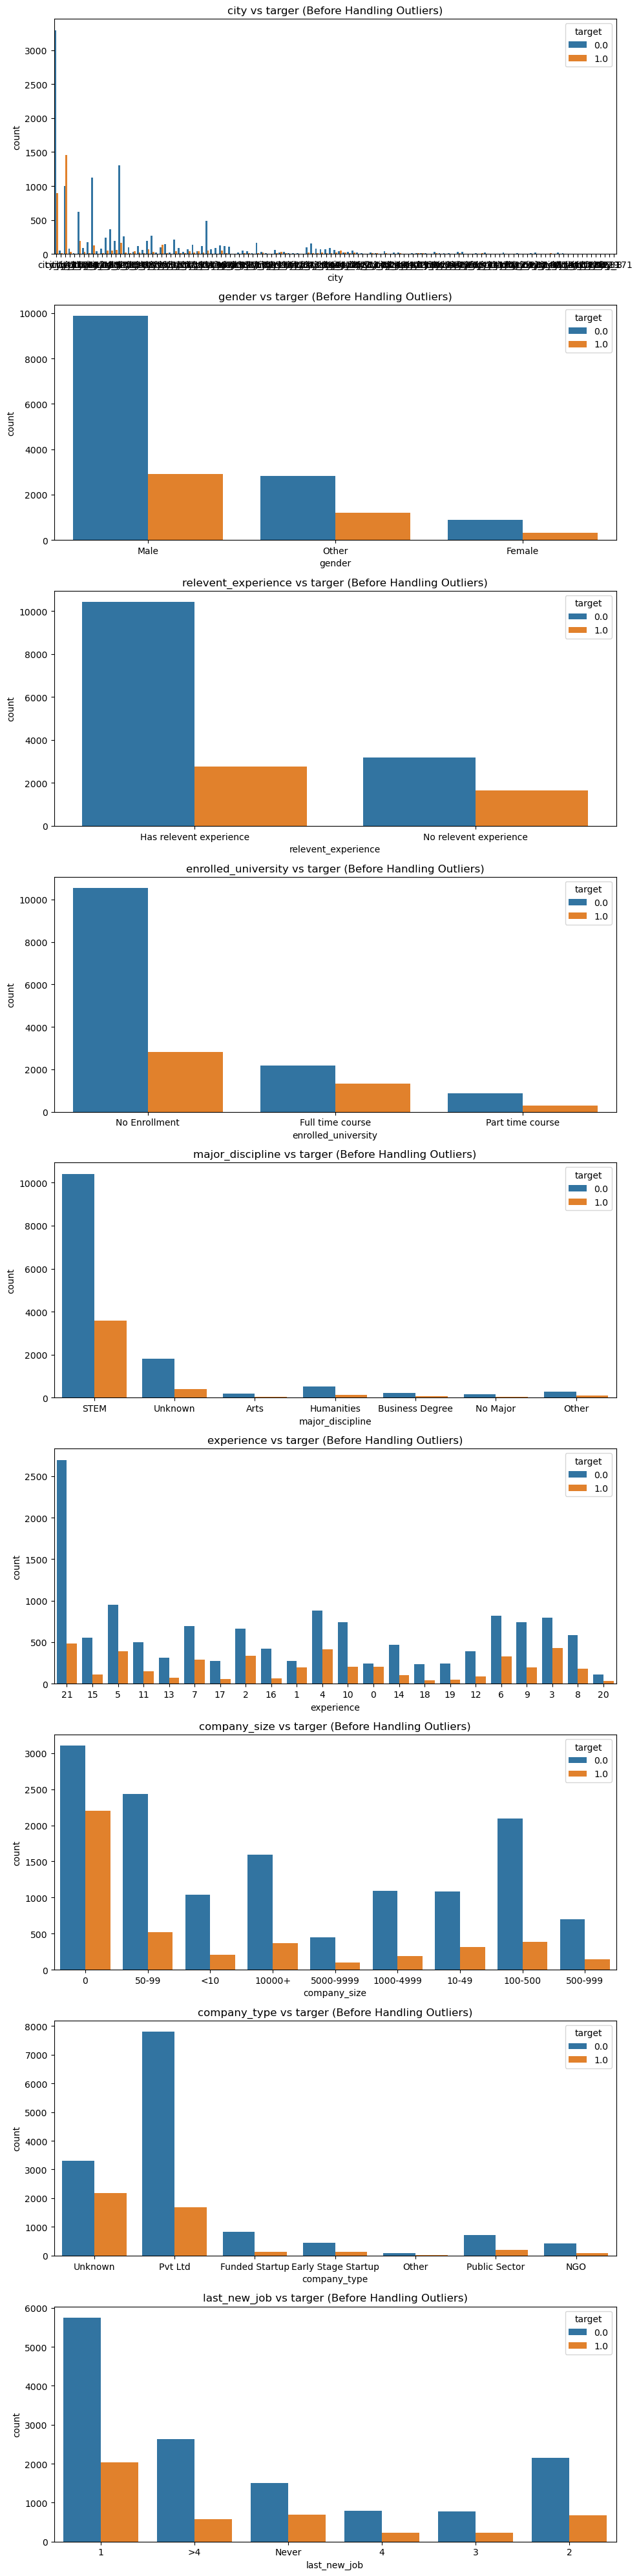

In [24]:
fig, axes = plt.subplots(len(cats), 1, figsize=(10, 40))
for i, feature in enumerate(cats):
    sns.countplot(x=feature, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs targer (Before Handling Outliers)')
    axes[i].legend(title='target', loc='upper right')
plt.tight_layout()
plt.show()

Countplot menampilkan distribusi fitur kategorikal dengan menghitung jumlah kemunculan setiap kategori, dibagi berdasarkan variabel target . Ini membantu memahami bagaimana kategori dalam setiap fitur terkait dengan variabel target.

Handling outlier
1. city_development_index
- Outlier sedikit dan berpotensi memiliki makna penting dalam kaitannya dengan target (kondisi kota dapat memengaruhi pencarian pekerjaan).
2. training_hours
- Banyak outlier ekstrem (>200 jam) yang dapat mendistorsi distribusi dan memengaruhi model, terutama model sensitif terhadap skala data.

## d. Feature Transformation

### Transformasi Feature Numeric
1. city_development_index
Tidak perlu dilakukan transformasi feature
2. training_hours
Perlu dilakukan transformasi log untuk membuat data ke arah distribusi normal

#### Feature: city_development_index

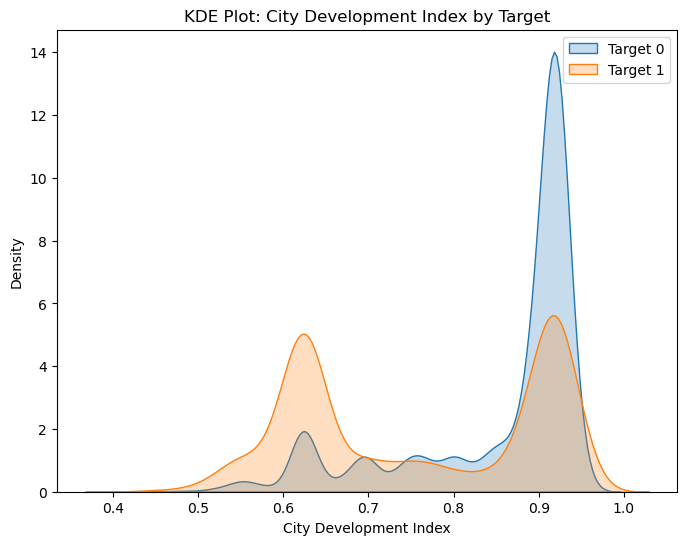

In [25]:
# Distribusi target dan fitur dengan city_development_index
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['city_development_index'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['city_development_index'], label='Target 1', shade=True)
plt.title('KDE Plot: City Development Index by Target')
plt.xlabel('City Development Index')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Feature: training_hours

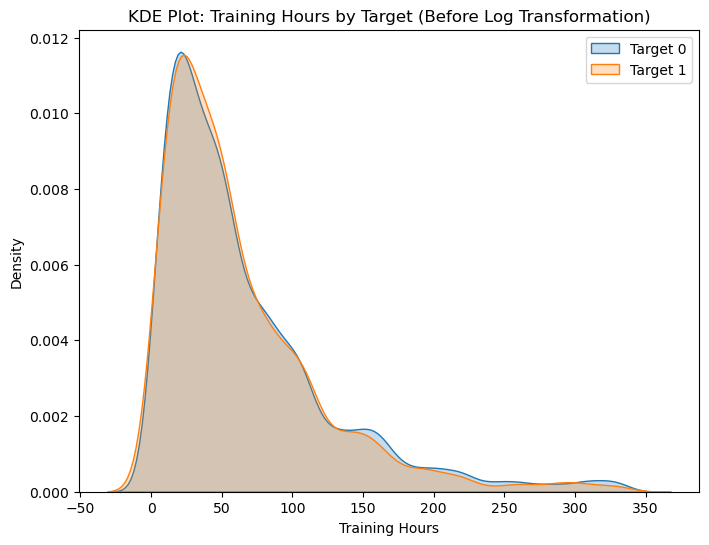

In [26]:
# Distribusi Training Hours dengan Target Sebelum Transformasi log
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Target 1', shade=True)
plt.title('KDE Plot: Training Hours by Target (Before Log Transformation)')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()


In [27]:
# transformasi log
df['training_hours'] = np.log1p(df['training_hours'])

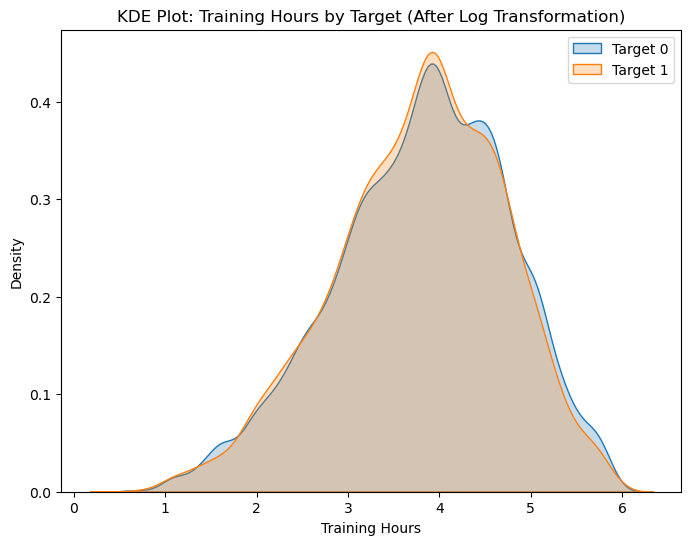

In [28]:
# Distribusi Training Hours dengan Target Setelah Transformasi log
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Target 1', shade=True)
plt.title('KDE Plot: Training Hours by Target (After Log Transformation)')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()


In [29]:
from scipy.stats import zscore

# Menyimpan shape data sebelum penghapusan outlier
print("Sebelum Menghapus Outlier:", df.shape)

# Menghapus outlier berdasarkan z-score
df = df[(zscore(df['training_hours']) > -3) & (zscore(df['training_hours']) < 3)]

# Menyimpan shape data setelah penghapusan outlier
print("Setelah Menghapus Outlier:", df.shape)


Sebelum Menghapus Outlier: (18014, 14)
Setelah Menghapus Outlier: (18005, 14)


## e. Feature encoding

### Label Encoding
Label Encoding dilakukan pada :
1. feature categorical yang memiliki tipe data ordinal (dapat diurutkan)
2. feature yang hanya memiliki 2 categorical data

#### Feature : relevent_experience

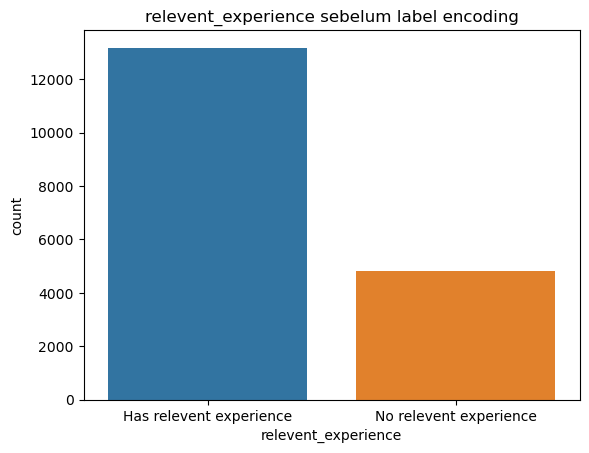

In [30]:
# Sebelum Encoding
plt.title('relevent_experience sebelum label encoding')
sns.countplot(x="relevent_experience", data = df)
plt.xticks(rotation = 0)
plt.show()

In [31]:
df["relevent_experience"] = [ 1 if i == "Has relevent experience"
                                    else 0 for i in df["relevent_experience"]]

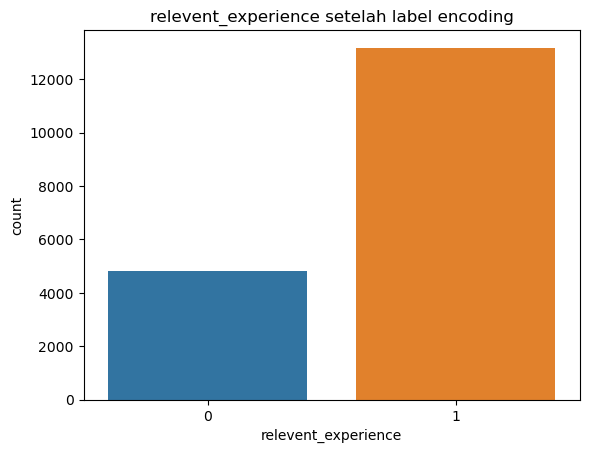

In [32]:
# Setelah Encoding
plt.title('relevent_experience setelah label encoding')
sns.countplot(x="relevent_experience", data = df)
plt.xticks(rotation = 0)
plt.show()

#### Feature : education_level

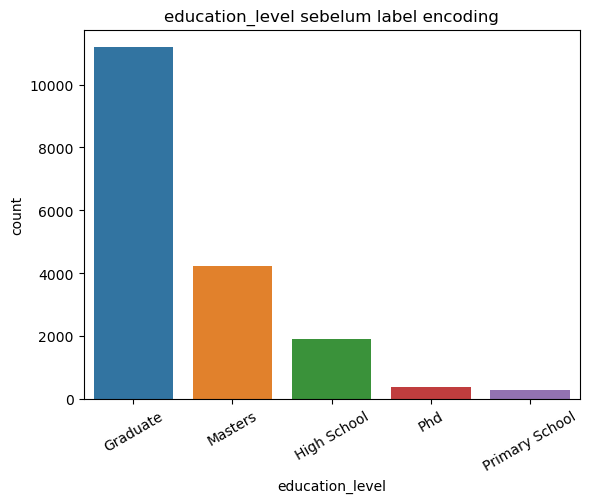

In [33]:
# Sebelum Encoding
plt.title('education_level sebelum label encoding')
sns.countplot(x="education_level", data = df)
plt.xticks(rotation = 30)
plt.show()

In [34]:
df["education_level"] = [ 5 if i == "Phd"
                                    else 4 if i == "Masters"
                                    else 3 if i == "Graduate"
                                    else 2 if i == "High School"
                                    else 1 for i in df["education_level"]]

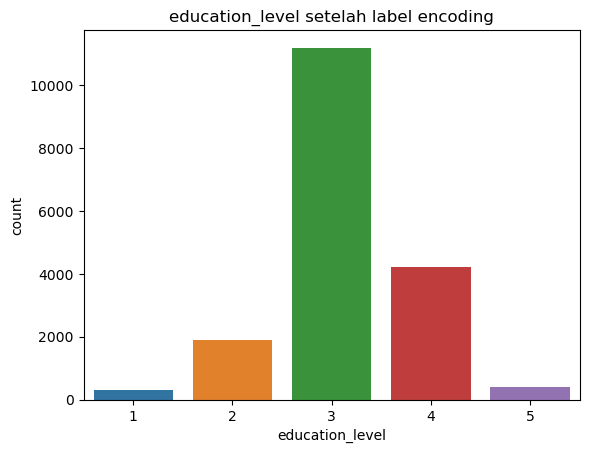

In [35]:
# Setelah Encoding
plt.title('education_level setelah label encoding')
sns.countplot(x="education_level", data = df)
plt.xticks(rotation = 0)
plt.show()

#### Feature : experience
pada data cleansing sebelumnya nilai unique <1 diubah jadi 0, dan >20 diubah jadi 21. type data yang masih object cukup diubah ke numeric

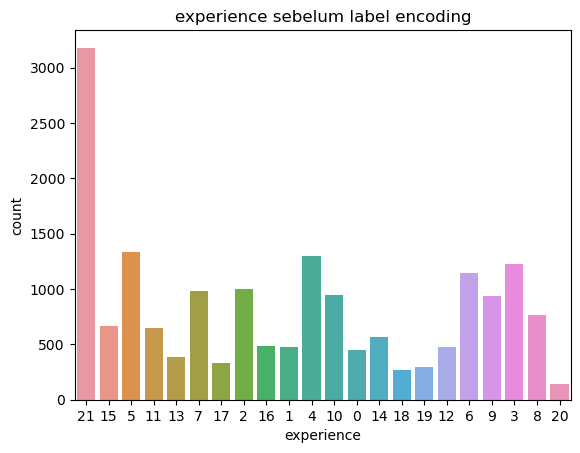

In [36]:
# Sebelum
plt.title('experience sebelum label encoding')
sns.countplot(x="experience", data = df)
plt.xticks(rotation = 0)
plt.show()

In [37]:
# df["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
#                                     else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
#                                     else 2 for i in df["experience"]]
df['experience'] = df['experience'].astype(int)

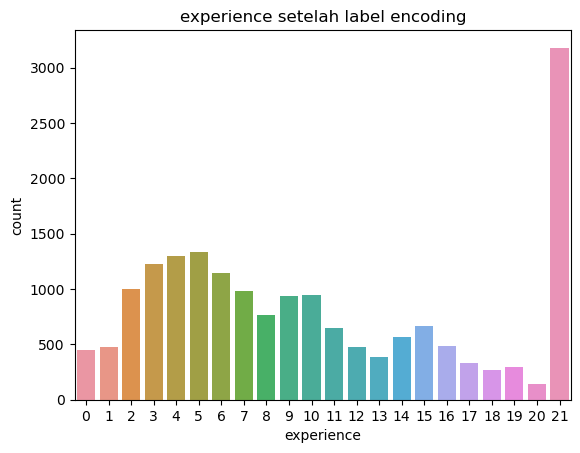

In [38]:
# Sesudah
plt.title('experience setelah label encoding')
sns.countplot(x="experience", data = df)
plt.xticks(rotation = 0)
plt.show()

#### Feature last_new_job

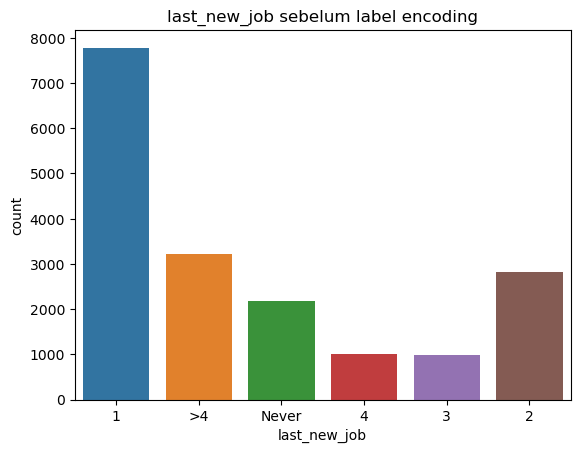

In [39]:
# Sebelum encoding
plt.title('last_new_job sebelum label encoding')
sns.countplot(x="last_new_job", data = df)
plt.xticks(rotation = 0)
plt.show()

In [40]:
df["last_new_job"] = [ 5 if i == ">4"
                               else 4 if i == "4"
                               else 3 if i == "3"
                               else 2 if i == "2"
                               else 1 if i == "1"
                               else 0 for i in df["last_new_job"]]

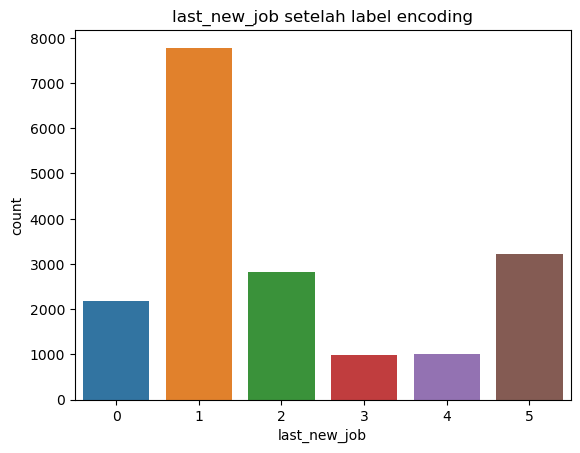

In [41]:
# Setelah encoding
plt.title('last_new_job setelah label encoding')
sns.countplot(x="last_new_job", data = df)
plt.xticks(rotation = 0)
plt.show()

### One Hot Encoding
One-hot encoding dilakukan pada categorical data yang bukan tipe data ordinal(dapat diurutkan)

#### Feature : gender

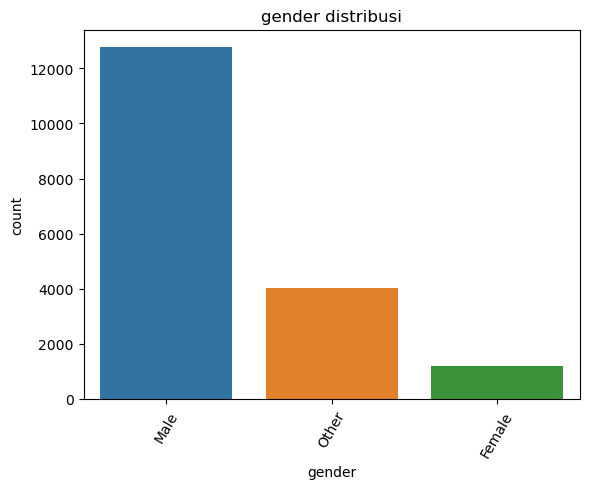

In [42]:
plt.title('gender distribusi')
sns.countplot(x="gender", data = df)
plt.xticks(rotation = 60)
plt.show()

In [43]:
# gender
# male = 0 , female = 1, other = 2
# df["gender"] = [ 0 if gender == "Male"
#                         else 1 if gender == "Female"
#                         else 2 for gender in df["gender"]]
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [44]:
df.T.tail(3).T

,gender_Female,gender_Male,gender_Other
0,0,1,0
1,0,1,0
2,0,0,1
4,0,1,0
5,0,0,1
...,...,...,...
19153,0,1,0
19154,0,1,0
19155,0,1,0
19156,0,1,0


#### Feature : enrolled_university

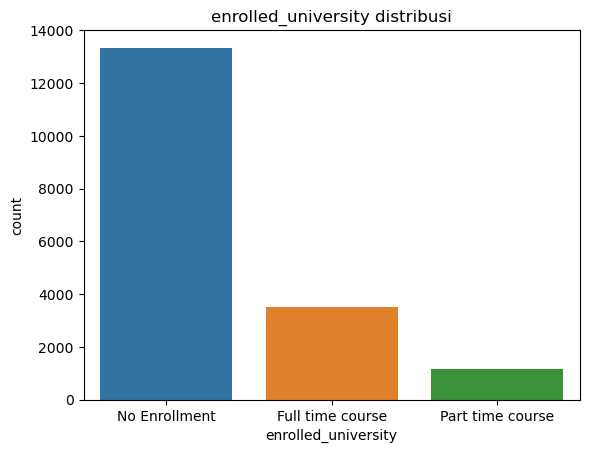

In [45]:
# Distribution Check
plt.title('enrolled_university distribusi')
sns.countplot(x="enrolled_university", data = df)
plt.xticks(rotation = 0)
plt.show()


In [46]:
# df["enrolled_university"] = [ 0 if i == "no_enrollment"
#                                     else 1 if i == "Full time course"
#                                     else 2 for i in df["enrolled_university"]]

# One-hot Encoding
df = pd.get_dummies(df, columns=['enrolled_university'], drop_first=False)

In [47]:
# Feature setelah One-Hot Encoding
df.T.tail(3).T

,enrolled_university_Full time course,enrolled_university_No Enrollment,enrolled_university_Part time course
0,0,1,0
1,0,1,0
2,1,0,0
4,0,1,0
5,0,0,1
...,...,...,...
19153,0,1,0
19154,0,1,0
19155,0,1,0
19156,0,1,0


#### Feature : major_discipline

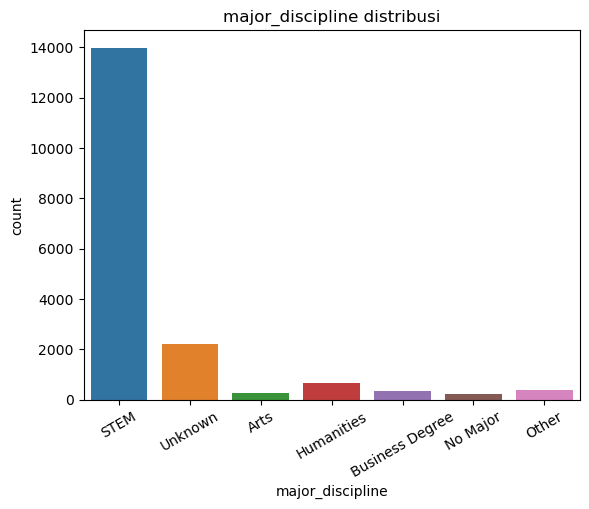

In [48]:
# Cek distribusi
plt.title('major_discipline distribusi')
sns.countplot(x="major_discipline", data = df)
plt.xticks(rotation = 30)
plt.show()

In [49]:
# df["major_discipline"] = [ 0 if i == "STEM"
#                                     else 1 if i == "Humanities"
#                                     else 2 if i == "Business Degree"
#                                     else 3 if i == "Arts"
#                                     else 4 if i == "No Major"
#                                     else 5 if i == "unknown"
#                                     else 6 for i in df["major_discipline"]]

# One-hot Encoding
df = pd.get_dummies(df, columns=['major_discipline'], drop_first=False)

In [50]:
# Feature setelah One-Hot Encoding
df.T.tail(7).T

,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,major_discipline_Unknown
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
19153,0,0,1,0,0,0,0
19154,0,0,0,0,0,1,0
19155,0,0,0,0,0,1,0
19156,0,0,0,0,0,0,1


#### Feature: company_size
dikarenakan 0 tidak cocok untuk mengisi missing value maka dibuat menjadi kategori baru 'unknown'. sehingga dibagi menjadi
- Small: <10, 10-49, 50-99
- Medium: 100-500, 500-999
- Large: 1000-4999, 5000-9999
- Unknown: Any undefined or missing values (e.g., '0')

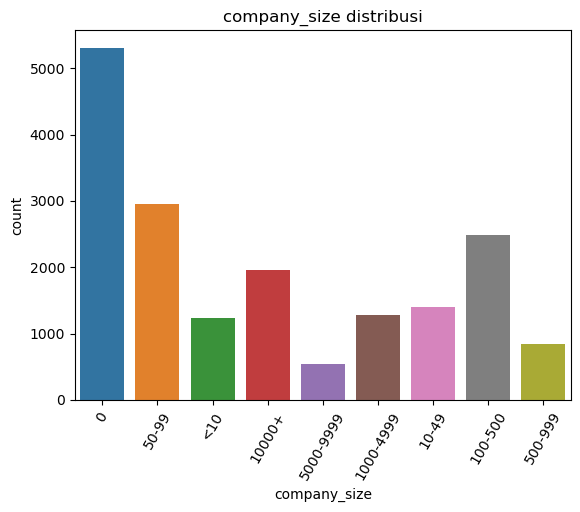

In [51]:
# Sebelum Encoding
plt.title('company_size distribusi')
sns.countplot(x="company_size", data = df)
plt.xticks(rotation = 60)
plt.show()

In [52]:
# df["company_size"] = [ 0 if i == '0'
#                       else 1 if i == '<10'
#                       else 2 if i == '10-49'
#                       else 3 if i == '50-99'
#                       else 4 if i == '100-500'
#                       else 5 if i == '500-999'
#                       else 6 if i == '1000-4999'
#                       else 7 if i == '5000-9999'
#                       else 8 for i in df["company_size"]]

# buat kategori baru
df["company_size"] = df["company_size"].apply(
    lambda x: "Small" if x in ['<10', '10-49', '50-99'] else
              "Medium" if x in ['100-500', '500-999'] else
              "Large" if x in ['1000-4999', '5000-9999'] else
              "Unknown"  # For '0' or missing values
)

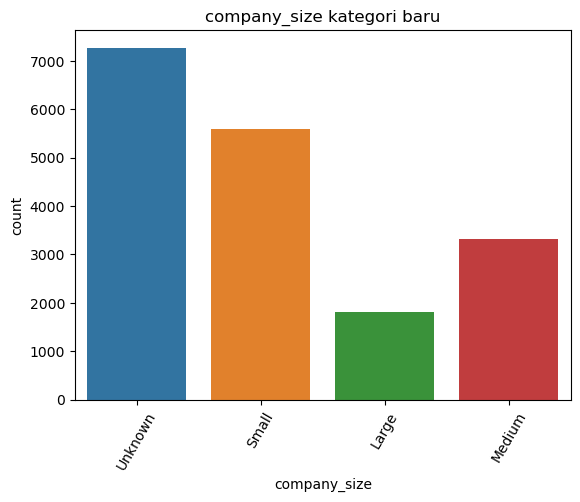

In [53]:
# kategori baru
plt.title('company_size kategori baru')
sns.countplot(x="company_size", data = df)
plt.xticks(rotation = 60)
plt.show()

In [54]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['company_size'], drop_first=False)

In [55]:
# Feature setelah One-Hot Encoding
df.T.tail(4).T

,company_size_Large,company_size_Medium,company_size_Small,company_size_Unknown
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
4,0,0,1,0
5,0,0,0,1
...,...,...,...,...
19153,0,0,0,1
19154,0,0,0,1
19155,0,0,1,0
19156,0,1,0,0


#### Feature: company_type

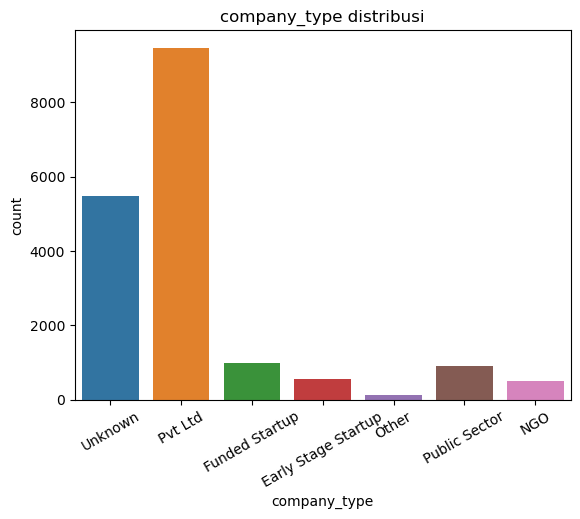

In [56]:
# Sebelum Encoding
plt.title('company_type distribusi')
sns.countplot(x="company_type", data = df)
plt.xticks(rotation = 30)
plt.show()

In [57]:
# df["company_type"] = [ 0 if i == "Pvt Ltd"
#                                else 1 if i == "Funded Startup"
#                                else 2 if i == "Public Sector"
#                                else 3 if i == "Early Stage Startup"
#                                else 4 if i == "NGO"
#                                else 5 for i in df["company_type"]]

# One-Hot Encoding
df = pd.get_dummies(df, columns=['company_type'], drop_first=False)

In [58]:
# Feature setelah One-Hot Encoding
df.T.tail(7).T

,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19153,0,0,0,0,0,0,1
19154,0,0,0,0,0,0,1
19155,0,0,0,0,0,1,0
19156,0,0,0,0,0,1,0


In [59]:
df.head()

,enrollee_id,city,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target,gender_Female,...,company_size_Medium,company_size_Small,company_size_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,8949,city_103,0.920,1,3,21,1,3.610918,1.0,0,...,0,0,1,0,0,0,0,0,0,1
1,29725,city_40,0.776,0,3,15,5,3.871201,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,11561,city_21,0.624,0,3,5,0,4.430817,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,666,city_162,0.767,1,4,21,4,2.197225,0.0,0,...,0,1,0,0,1,0,0,0,0,0
5,21651,city_176,0.764,1,3,11,1,3.218876,1.0,0,...,0,0,1,0,0,0,0,0,0,1


## f. Class Imbalance

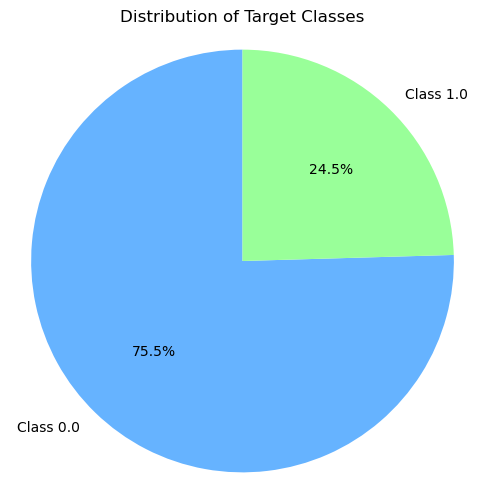

In [60]:
counts = df['target'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=[f'Class {x}' for x in counts.index], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Target Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

- 24.5 persen employee memilih mencari pekerjaan baru
- data imbalance ini akan dihandle saat sebelum modelling / menggunakan model yang robust terhadap imbalance data

# 2.Feature Engineering

## a. Feature Selection


In [61]:
# Cek deskripsi data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,18005.0,NaN,NaN,NaN,16903.531797,9665.633032,1.0,8526.0,17014.0,25324.0,33380.0
city,18005,123,city_103,4192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,18005.0,NaN,NaN,NaN,0.83172,0.122128,0.448,0.745,0.91,0.92,0.949
relevent_experience,18005.0,NaN,NaN,NaN,0.732186,0.442833,0.0,0.0,1.0,1.0,1.0
education_level,18005.0,NaN,NaN,NaN,3.140739,0.688375,1.0,3.0,3.0,4.0,5.0
experience,18005.0,NaN,NaN,NaN,10.281755,6.760994,0.0,5.0,9.0,16.0,21.0
last_new_job,18005.0,NaN,NaN,NaN,2.026993,1.673647,0.0,1.0,1.0,3.0,5.0
training_hours,18005.0,NaN,NaN,NaN,3.801589,0.942107,1.098612,3.178054,3.871201,4.488636,5.820083
target,18005.0,NaN,NaN,NaN,0.245432,0.430355,0.0,0.0,0.0,0.0,1.0
gender_Female,18005.0,NaN,NaN,NaN,0.066981,0.249997,0.0,0.0,0.0,0.0,1.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18005 entries, 0 to 19157
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   enrollee_id                           18005 non-null  int64  
 1   city                                  18005 non-null  object 
 2   city_development_index                18005 non-null  float64
 3   relevent_experience                   18005 non-null  int64  
 4   education_level                       18005 non-null  int64  
 5   experience                            18005 non-null  int32  
 6   last_new_job                          18005 non-null  int64  
 7   training_hours                        18005 non-null  float64
 8   target                                18005 non-null  float64
 9   gender_Female                         18005 non-null  uint8  
 10  gender_Male                           18005 non-null  uint8  
 11  gender_Other   

untuk enrolled id dan city yang tidak significant bisa dijadikan pertimbangan untuk di drop.

In [63]:
# prompt: drop kolom enrollee_id dan city

df = df.drop(['enrollee_id', 'city'], axis=1)

In [64]:
# Urutkan feature
columns_order =['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'last_new_job', 'training_hours',
       'gender_Female', 'gender_Male', 'gender_Other',
       'enrolled_university_Full time course',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_size_Large', 'company_size_Medium', 'company_size_Small',
       'company_size_Unknown', 'company_type_Early Stage Startup',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unknown','target']
df = df[columns_order]

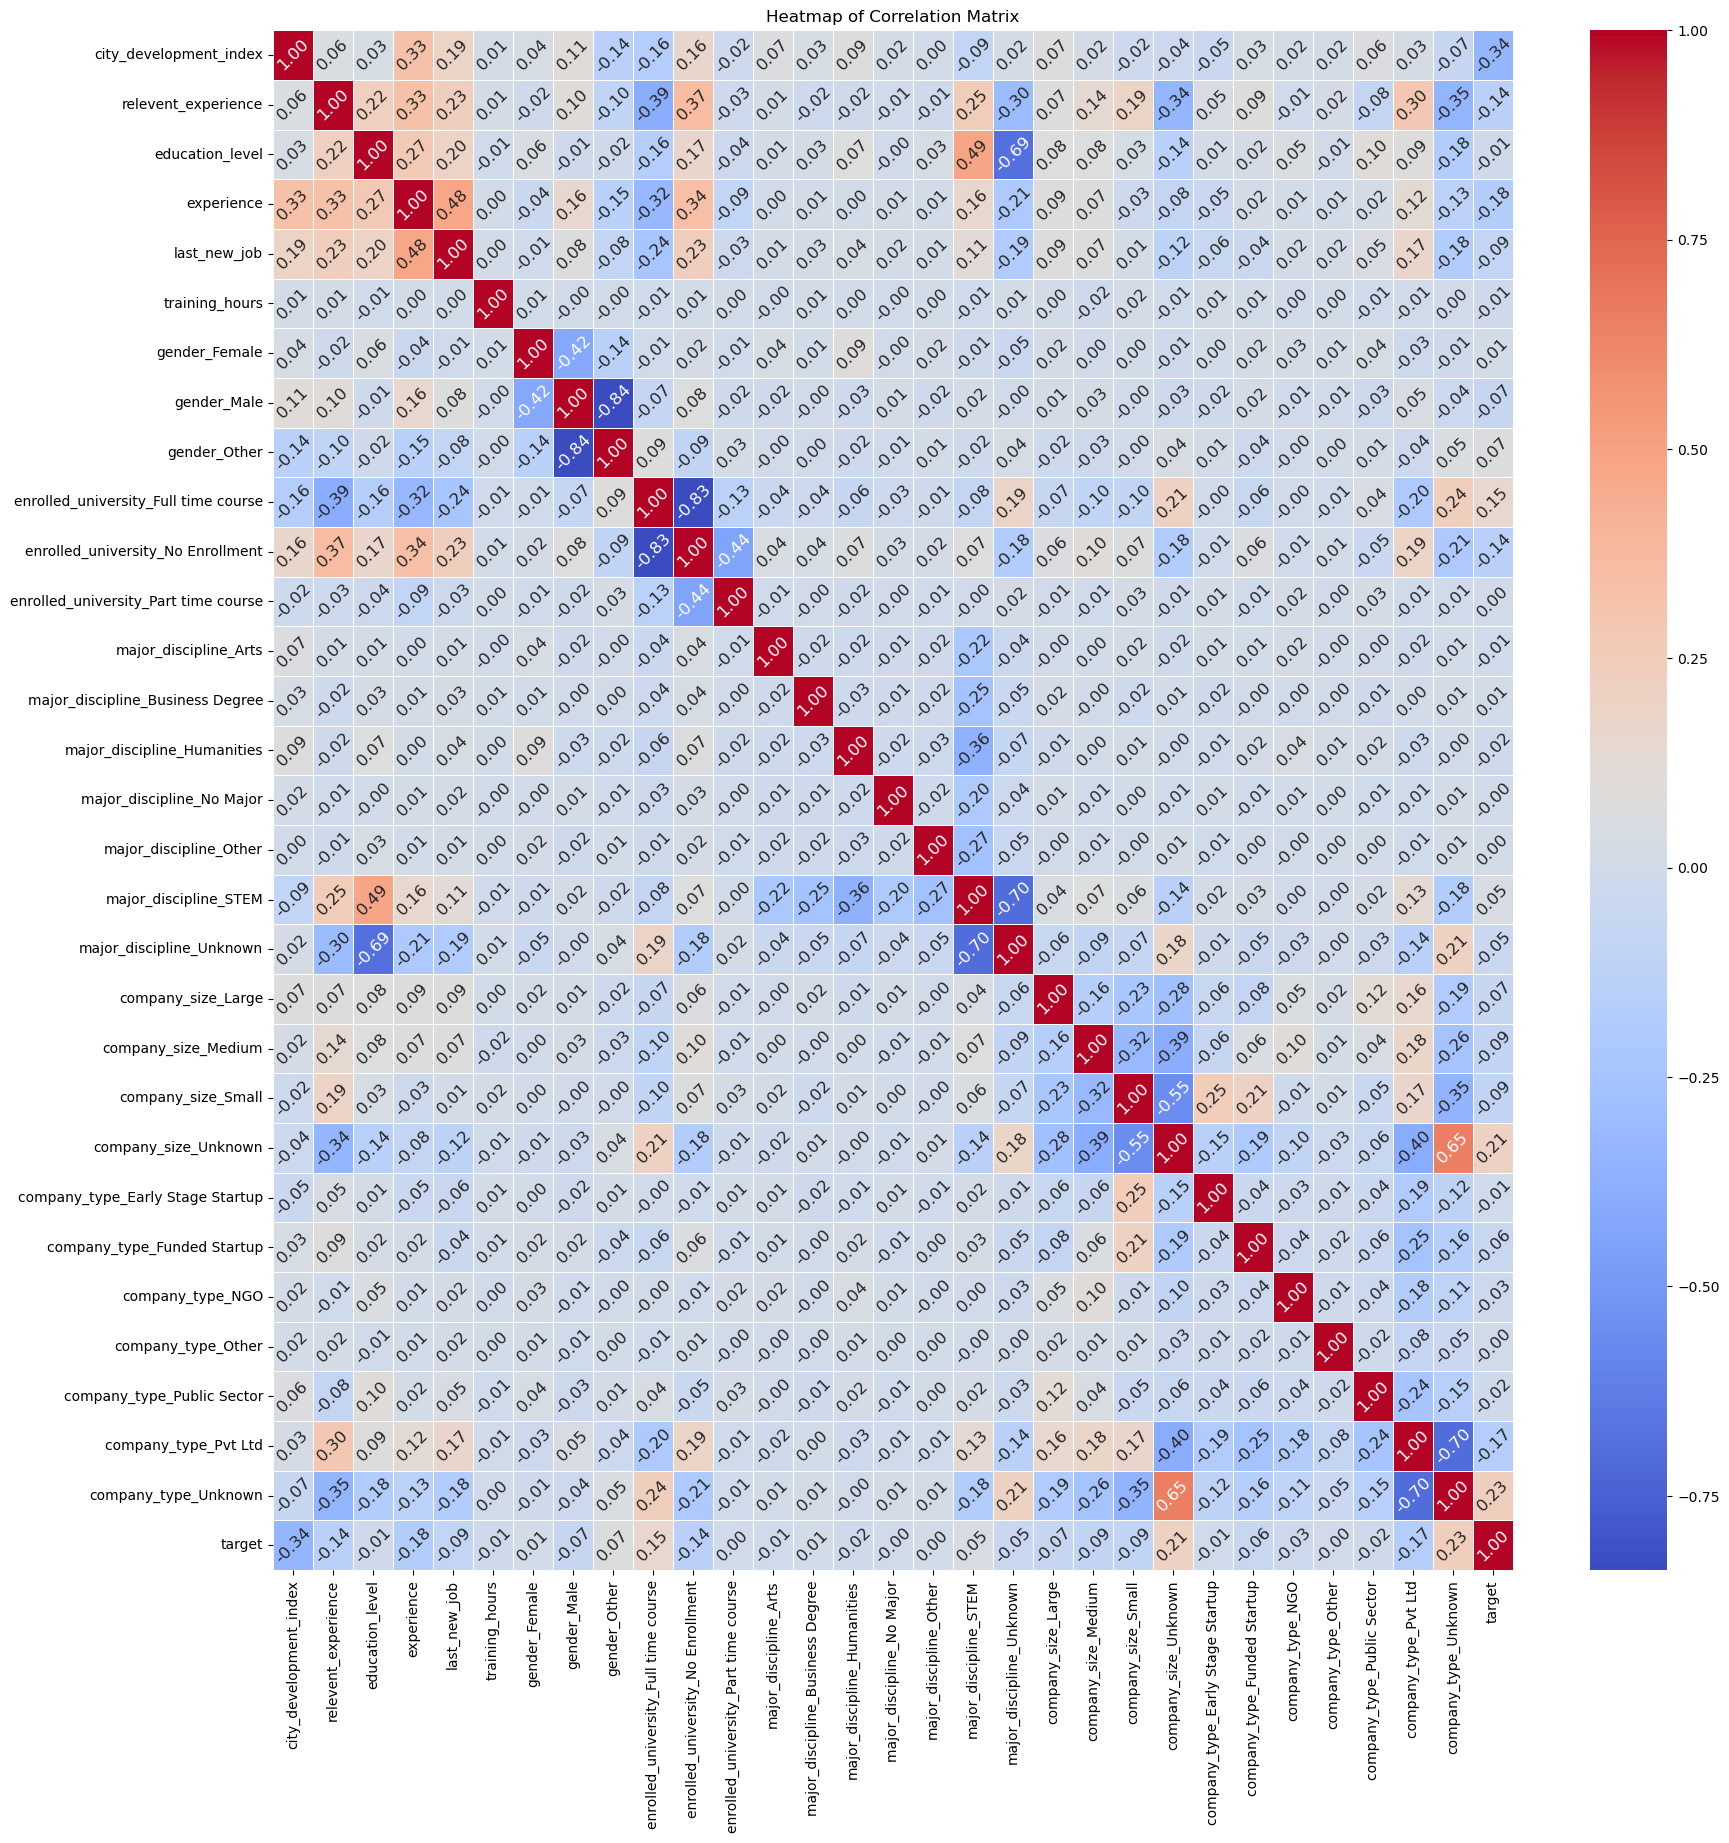

In [65]:
# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 12, "rotation": 45})

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix')

# Menampilkan plot
plt.show()

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the absolute values of the correlation matrix to consider both positive and negative correlations
abs_correlation_matrix = correlation_matrix.abs()

# Get the highest correlation for each variable
highest_correlation = abs_correlation_matrix.apply(lambda x: x[x != 1].max())

# Create a DataFrame or table to display the highest correlation for each variable
highest_correlation_df = pd.DataFrame(highest_correlation, columns=['Highest Correlation'])
highest_correlation_df.index.name = 'Variable'
highest_correlation_df.reset_index(inplace=True)

# Sort the DataFrame by highest correlation values in descending order
highest_correlation_df_sorted = highest_correlation_df.sort_values(by='Highest Correlation', ascending=False)

highest_correlation_df_sorted

,Variable,Highest Correlation
7,gender_Male,0.838685
8,gender_Other,0.838685
9,enrolled_university_Full time course,0.833091
10,enrolled_university_No Enrollment,0.833091
17,major_discipline_STEM,0.699991
18,major_discipline_Unknown,0.699991
29,company_type_Unknown,0.696170
28,company_type_Pvt Ltd,0.696170
2,education_level,0.686170
22,company_size_Unknown,0.650593


Here are commonly accepted interpretations for Pearson correlation values:

| Correlation Strength            | Absolute Value of r |
|---------------------------------|----------------------|
| **Strong correlation**          | r ≥ 0.7             |
| **Moderate correlation**        | 0.5 ≤ r < 0.7       |
| **Weak correlation**            | 0.3 ≤ r < 0.5       |
| **Very weak or no correlation** | r < 0.3             |

- Terdapat multikolinearitas kuat antara beberapa feature. Direkomendasikan untuk menggunakan model yang robust terhadap multikolinearitas

In [67]:
df

Variable,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,...,company_size_Small,company_size_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,target
0,0.920,1,3,21,1,3.610918,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
1,0.776,0,3,15,5,3.871201,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0.0
2,0.624,0,3,5,0,4.430817,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0.0
4,0.767,1,4,21,4,2.197225,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0.0
5,0.764,1,3,11,1,3.218876,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,3,14,1,3.761200,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
19154,0.920,1,3,14,4,3.970292,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
19155,0.920,1,3,21,4,3.806662,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0.0
19156,0.802,1,2,0,2,4.584967,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [68]:
from scipy.stats import chi2_contingency

def run_chi_square_tests(df, significance_level=0.05):
    # Identify categorical columns
    cat_columns = df.columns

    # Store results
    results = []

    # Iterate through all pairs of categorical columns
    for i in range(len(cat_columns)):
        for j in range(i+1, len(cat_columns)):
            col1, col2 = cat_columns[i], cat_columns[j]

            # Create contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Perform chi-square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Check significance
            is_significant = p_value < significance_level

            # Store results
            results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-square': chi2,
                'p-value': p_value,
                'DoF': dof,
                'Significant': is_significant
            })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df




In [69]:
# Run chi-square tests
results = run_chi_square_tests(df)

In [70]:
results[(results['Significant'] == False) & (results['Column 2'] == 'target')]

,Column 1,Column 2,Chi-square,p-value,DoF,Significant
164,training_hours,target,248.456383,0.323710,239,False
188,gender_Female,target,1.307935,0.252769,1,False
293,enrolled_university_Part time course,target,0.000000,1.000000,1,False
311,major_discipline_Arts,target,1.545580,0.213789,1,False
328,major_discipline_Business Degree,target,0.422951,0.515468,1,False
359,major_discipline_No Major,target,0.000000,1.000000,1,False
373,major_discipline_Other,target,0.030107,0.862248,1,False
443,company_type_Early Stage Startup,target,1.789501,0.180987,1,False
458,company_type_Other,target,0.010947,0.916670,1,False


Terdapat beberapa feature yang tidak significant terhadap target, pada saat dilakuakn chi-square, bisa dijadikan pertimbangan untuk di drop apabila model tidak bagus kedepannya, untuk sekarang tidak di drop dulu.

In [71]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# import pandas as pd

# # Misalkan df adalah DataFrame dengan kolom fitur dan target
# X = df.drop('target', axis=1)  # Fitur
# y = df['target']  # Target

# # Pilih fitur menggunakan Chi-Square
# chi2_selector = SelectKBest(chi2, k='all')  # 'all' untuk memilih semua fitur yang signifikan
# X_new = chi2_selector.fit_transform(X, y)

# # Tampilkan fitur yang terpilih
# selected_features = X.columns[chi2_selector.get_support()]
# print(selected_features)



## b. Feature Extraction
Untuk Sekarang Fitur yang digunakan berasal dari label encoding dan one-hot encoding dan beberapa fitur numerik

## c. Feature Tambahan
Untuk Sementara tidak ada Fitur Tambahan

In [74]:
# Hasil data Preprocessing yang siap di modelling
df

Variable,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,...,company_size_Small,company_size_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,target
0,0.920,1,3,21,1,3.610918,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
1,0.776,0,3,15,5,3.871201,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0.0
2,0.624,0,3,5,0,4.430817,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0.0
4,0.767,1,4,21,4,2.197225,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0.0
5,0.764,1,3,11,1,3.218876,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,3,14,1,3.761200,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
19154,0.920,1,3,14,4,3.970292,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
19155,0.920,1,3,21,4,3.806662,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0.0
19156,0.802,1,2,0,2,4.584967,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0


# 3.Github Repository
[Go to Repository](https://github.com/Refdinal/insight-hustler)


simpan data hasil preprocessing

In [75]:
# from google.colab import files
# # Simpan DataFrame ke file CSV
# df.to_csv('data_preprocessing.csv', index=False)

# # Gunakan google.colab.files untuk mengunduh file
# files.download('data_preprocessing.csv')

df.to_csv('data_preprocessed.csv', index=False)
print("File CSV telah disimpan.")

File CSV telah disimpan.
